In [67]:
from URSGeneClassifier import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import operator

In [73]:
X_train, X_test, y_train, y_test, X_full, y_full = load_and_format_training_data('alz/microglia/saved_full_train.pkl')
scores = {}


5 fold cross validation scores:
[0.48484848 0.48484848 0.53125    0.5        0.5       ]

5 fold cross validation score average:
0.500189393939394

AUROC score:
0.5


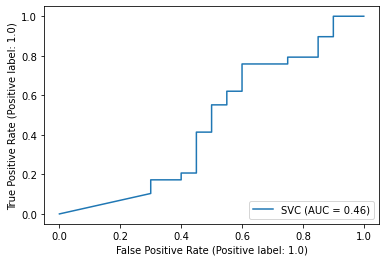

29 wrong out of 49
Accuracy: 0.40816326530612246


In [74]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
evaluate_model(svm_linear, X_full, y_full, X_test, y_test, scores)

{'C': 1000, 'kernel': 'linear'}

5 fold cross validation scores:
[0.51515152 0.51515152 0.59375    0.53125    0.5       ]

5 fold cross validation score average:
0.531060606060606

AUROC score:
0.5


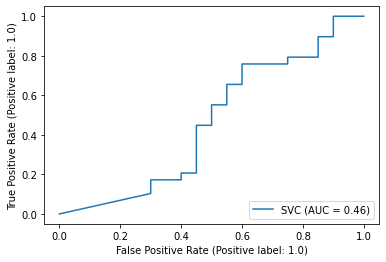

29 wrong out of 49
Accuracy: 0.40816326530612246


In [75]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

grid_svm_linear = GridSearchCV(svm_linear, param_grid, cv=5)
grid_svm_linear.fit(X_train, y_train)

print(grid_svm_linear.best_params_)
evaluate_model(grid_svm_linear.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.48484848 0.54545455 0.65625    0.5        0.5       ]

5 fold cross validation score average:
0.5373106060606061

AUROC score:
0.6508620689655172


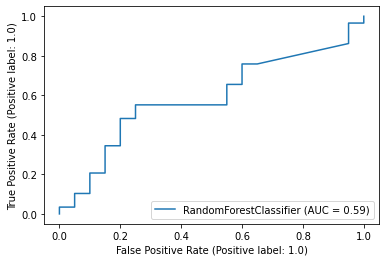

18 wrong out of 49
Accuracy: 0.6326530612244898


In [18]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
evaluate_model(rfc, X_full, y_full, X_test, y_test, scores)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 500}

5 fold cross validation scores:
[0.51515152 0.54545455 0.65625    0.59375    0.5625    ]

5 fold cross validation score average:
0.5746212121212121

AUROC score:
0.6163793103448276


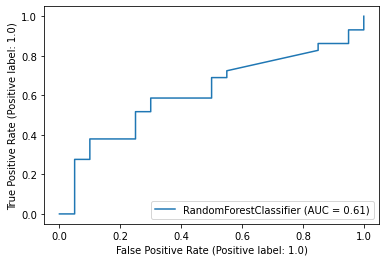

20 wrong out of 49
Accuracy: 0.5918367346938775


In [77]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rfc = GridSearchCV(rfc, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

print(grid_rfc.best_params_)
evaluate_model(grid_rfc.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.51515152 0.48484848 0.5        0.5        0.5       ]

5 fold cross validation score average:
0.5

AUROC score:
0.5


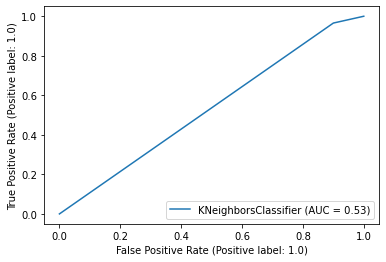

29 wrong out of 49
Accuracy: 0.40816326530612246


In [79]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
evaluate_model(knn, X_full, y_full, X_test, y_test, scores)

{'n_neighbors': 19}

5 fold cross validation scores:
[0.54545455 0.51515152 0.65625    0.5625     0.625     ]

5 fold cross validation score average:
0.5808712121212121

AUROC score:
0.6275862068965518


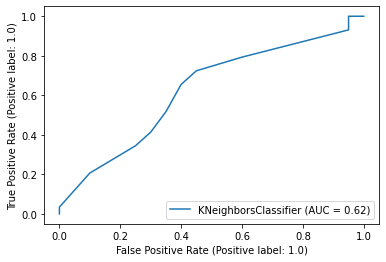

18 wrong out of 49
Accuracy: 0.6326530612244898


In [80]:
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
grid_knn = GridSearchCV(knn, param_grid, cv=5)
grid_knn.fit(X_train, y_train)

print(grid_knn.best_params_)
evaluate_model(grid_knn.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.48484848 0.54545455 0.5        0.59375    0.5       ]

5 fold cross validation score average:
0.524810606060606

AUROC score:
0.4724137931034483


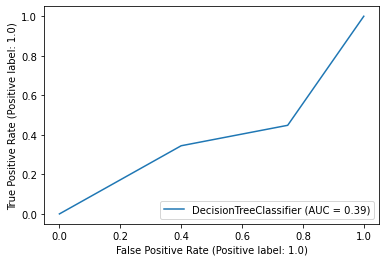

27 wrong out of 49
Accuracy: 0.44897959183673475


In [82]:
dtc = DecisionTreeClassifier(max_depth=100)
dtc.fit(X_train, y_train)
evaluate_model(dtc, X_full, y_full, X_test, y_test, scores)

{'max_leaf_nodes': 25, 'min_samples_split': 2}

5 fold cross validation scores:
[0.51515152 0.60606061 0.53125    0.5625     0.53125   ]

5 fold cross validation score average:
0.5492424242424242

AUROC score:
0.531896551724138


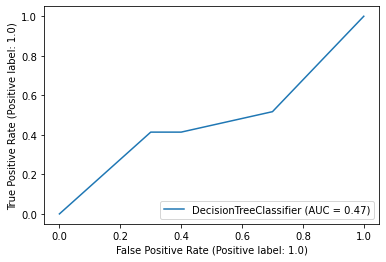

24 wrong out of 49
Accuracy: 0.5102040816326531


In [84]:
param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], 'min_samples_split': [2, 3, 4]}
grid_dtc = GridSearchCV(dtc, param_grid, cv=5)
grid_dtc.fit(X_train, y_train)

print(grid_dtc.best_params_)
evaluate_model(grid_dtc.best_estimator_, X_full, y_full, X_test, y_test, scores)


5 fold cross validation scores:
[0.60606061 0.51515152 0.59375    0.625      0.4375    ]

5 fold cross validation score average:
0.5554924242424242

AUROC score:
0.5


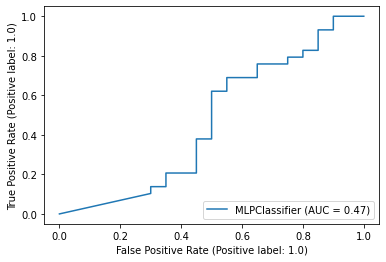

29 wrong out of 49
Accuracy: 0.40816326530612246


In [96]:
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train, y_train)
evaluate_model(mlp, X_full, y_full, X_test, y_test, scores)

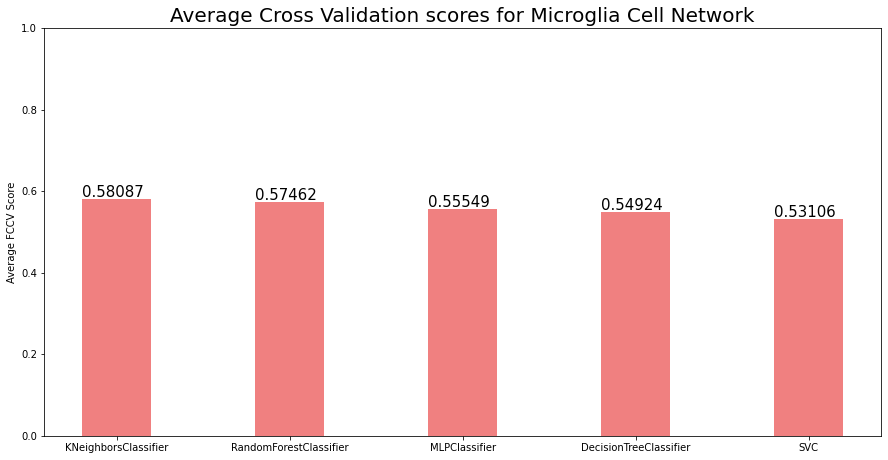

In [97]:
scores = dict(sorted(scores.items(), key=operator.itemgetter(1),reverse=True))
fig = plt.figure(figsize = (15, 7.5))

ax = plt.gca()
ax.set_ylim([0,1]) 
plt.ylabel('Average FCCV Score')
plt.title("Average Cross Validation scores for Microglia Cell Network", fontsize=20)
 
# creating the bar plot
bars = plt.bar(scores.keys(), scores.values(), color ='lightcoral',
        width = 0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, format(yval, '.5f'), fontsize=15)

In [ ]:
# mlp = MLPRegressor(max_iter=1000)
# mlp.fit(X_train, y_train)
# evaluate_model(mlp, X_full, y_full, X_test, y_test, scores)